<a href="https://colab.research.google.com/github/Charan1010/Text-to-Image-Generation-using-Conditonal-GAN/blob/master/GAN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/"

 colab	'Colab Notebooks'


In [4]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62360000 @  0x7f4ef40082a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 24.5MB/s 
    100% |████████████████████████████████| 2.0MB 5.9MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [5]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [6]:
cd  "/content/drive/My Drive/colab"


/content/drive/My Drive/colab


In [7]:
ls


GAN_mnist.ipynb  images/  model/  static/


In [0]:
import pandas as pd

In [0]:
df_train=pd.read_csv('static/fashionmnist/fashion-mnist_train.csv')

In [10]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train=df_train['label']

In [0]:
x_train=df_train.loc[:,df_train.columns!="label"]/255

In [13]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [0]:
import torch
import torch.utils.data
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [0]:
x_train_tensor=torch.from_numpy(x_train.values)
y_train_tensor=torch.from_numpy(y_train.values).type(torch.LongTensor)
x_test_tensor=torch.from_numpy(x_test.values)
y_test_tensor=torch.from_numpy(y_test.values).type(torch.LongTensor)

In [0]:
train_dataset=torch.utils.data.TensorDataset(x_train_tensor,y_train_tensor)
test_dataset=torch.utils.data.TensorDataset(x_test_tensor,y_test_tensor)

In [0]:
batch_size=1
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size)

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, labels):
      x=x.view(x.size(0),784)
      c=self.label_emb(labels)
      x=torch.cat([x,c],1)
      out=self.model(x)
      return out.squeeze()
      
      
      

In [0]:
class Generator(nn.Module):
  def __init__(self):
    
    super().__init__()
    
    
    self.label_emb=nn.Embedding(10,10)
    
    self.model=nn.Sequential(
        nn.Linear(110,256),
        nn.LeakyReLU(0.2,inplace=True),
        #nn.Dropout(0.3),
        nn.Linear(256,512),
        nn.LeakyReLU(0.2,inplace=True),
        #nn.Dropout(0.3),
        nn.Linear(512,1024),
        nn.LeakyReLU(0.2,inplace=True),
        #nn.Dropout(0.3),
        nn.Linear(1024,784),
        nn.Tanh()
    
    )
    
  def forward(self,z,labels):
    z=z.view(z.size(0),100)
    c=self.label_emb(labels)
    x=torch.cat([z,c],1)
    out=self.model(x)
    return out.view(out.size(0),28,28)
    
    
      
  

In [0]:
generator=Generator().cuda()
discriminator=Discriminator().cuda()

In [0]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)

In [0]:
def func(n,end= 10,start= 0):
    return (list(range(start, n))) + (list(range(n+1, end)))

In [0]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).cuda())
    g_loss.backward()
    g_optimizer.step()
    return g_loss.item()

In [0]:
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train with real images
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).cuda())
    
    #train with real images and fake labels
    not_real_labels=Variable(torch.LongTensor(np.array([random.choice(func(label)) for label in labels]))).cuda()
    wrong_label_validity=discriminator(real_images,not_real_labels)
    wrong_label_loss=criterion(wrong_label_validity,Variable(torch.zeros(batch_size)).cuda())
    
    
    # train with fake images
    z = Variable(torch.randn(batch_size, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).cuda())
    
    d_loss = real_loss + fake_loss+wrong_label_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.item()


In [28]:
import 
from tqdm import tqdm
n_critic = 5
display_step = 300
num_epochs=20
for epoch in range(num_epochs):
    print('Starting epoch {}...'.format(epoch))
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        real_images = Variable(images.float()).cuda()
        #grid = make_grid(real_images, nrow=10, normalize=True).permute(1,2,0).numpy()
        #plt.imshow(grid)
        #plt.show()
        
        labels = Variable(labels).cuda()
        discriminator.train()
        generator.train()
        batch_size = real_images.size(0)
        d_loss = discriminator_train_step(len(real_images), discriminator,
                                          generator, d_optimizer, criterion,
                                          real_images, labels)
        

        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)

    generator.eval()
    print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))
    z = Variable(torch.randn(9, 100)).cuda()
    labels = Variable(torch.LongTensor(np.arange(9))).cuda()
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
5it [00:00, 49.97it/s]

Starting epoch 0...


1579it [00:24, 62.23it/s]

KeyboardInterrupt: ignored

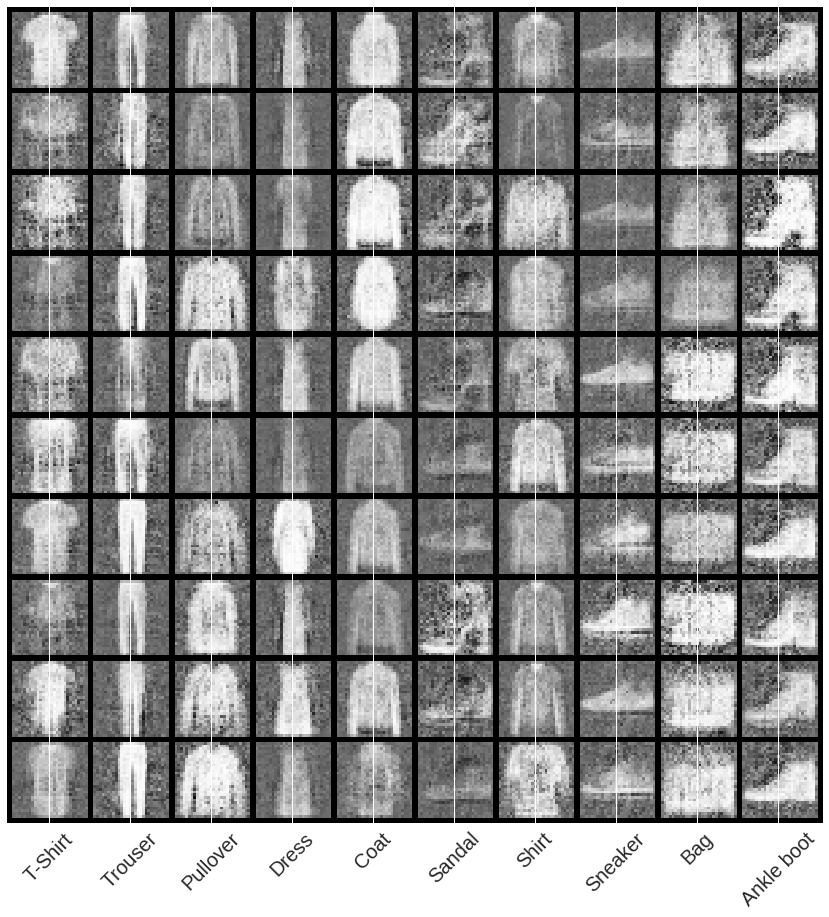

In [0]:
z = Variable(torch.randn(100, 100)).cuda()
labels = Variable(torch.LongTensor([i for _ in range(10) for i in range(10)])).cuda()
sample_images = generator(z, labels).unsqueeze(1).data.cpu()
grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).numpy()
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid)
_ = plt.yticks([])
_ = plt.xticks(np.arange(15, 300, 30), ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, fontsize=20)